In [4]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Coin Flips

In [5]:
def flip_head():
    if random.random() > 0.5:
        return True
    return False

def flip_n_times(n = 10):
    return [flip_head() for i in xrange(n)]

def flip_m_coins_n_times(m=1000, n=10):
    return [sum(flip_n_times(n)) for i in xrange(m)]

def calc_vmin_v_vrand():
    coins = flip_m_coins_n_times()
    v1 = 1.* coins[0] / 10
    vrand = 1.* coins[random.randint(0, 999)] / 10
    vmin = 1. * min(coins) / 10
    return v1, vrand, vmin

def get_x_v(x=100000):
    v1s, vrands, vmins = [], [], []
    for i in xrange(x):
        v1, vrand, vmin = calc_vmin_v_vrand()
        v1s.append(v1)
        vrands.append(vrand)
        vmins.append(vmin)
    return v1s, vrands, vmins

In [6]:
v1s, vrands, vmins = get_x_v()

#### #1 = b

In [7]:
np.mean(vmins)

0.037322000000000001

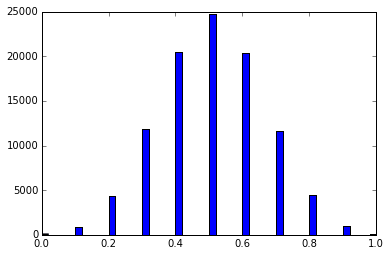

In [8]:
_ = plt.hist(v1s, bins=50)

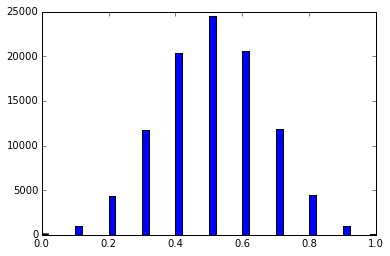

In [9]:
_ = plt.hist(vrands, bins=50)

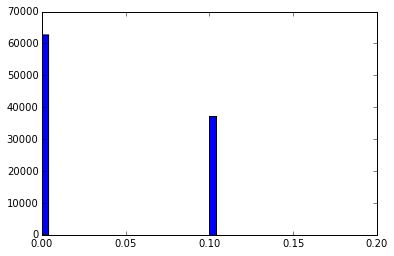

In [10]:
_ = plt.hist(vmins, bins=50)

#### #2 = d

#### Linear Regression for Classification

In [11]:
def get_slope_intercept(v):
    slope = v[1]/(-1*v[2])
    intercept = v[0]/(-1*v[2])
    return slope, intercept

def create_seperation_vector():
    xA, yA, xB, yB = [random.uniform(-1, 1) for i in xrange(4)]
    v = np.array([xB*yA - xA*yB, yB - yA, xA - xB])
    return v

def generate_x(n):
    X = np.zeros((n, 3))
    for i in xrange(n):
        x, y = [random.uniform(-1, 1) for j in xrange(2)]
        X[i] = np.array([1, x, y])
    return X

def create_labels(v, X):
    func = lambda x: np.sign(v.dot(x))
    return np.apply_along_axis(func, 1, X)

def plot_X_with_label(X, y, show=False):
    X_pos = X[y > 0]
    X_neg = X[y < 0]
    plt.scatter(X_pos[:, 1], X_pos[:, 2], color='r')
    plt.scatter(X_neg[:, 1], X_neg[:, 2], color='b')
    
    if show:
        plt.show()
        
def plot_seperation_plane(m, b, linestyle='-', color='g'):
    x = np.linspace(-1, 1)
    plt.plot(x, m*x + b, linestyle=linestyle, color=color)

In [67]:
def generate_data(n=100):
    v = create_seperation_vector()
    m, b = get_slope_intercept(v)
    D = generate_x(n)
    labels = create_labels(v, D)
    return v, D, labels

In [68]:
v, X, y = generate_data()

In [178]:
class LinearRegression(object):

    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        out = np.sign(X.dot(self.w.reshape(self.w.shape[0], 1)))
        return out.reshape(out.shape[0])
    
    def get_insample_error(self):
        y_in = self.predict(self.X)
        return 1. * sum(self.y != y_in) / self.y.shape[0]
    
    def get_outsample_error(self, X, y):
        y_out = self.predict(X)
        return 1. * sum(y != y_out) / y.shape[0]

Testing Linear Regression class

In [179]:
cls = LinearRegression(X, y)

In [180]:
y_in = cls.predict(X)

In [181]:
cls.get_insample_error()

0.02

In [182]:
def run_1000_samples():
    gs, linregs, e_in = [], [], []
    for i in xrange(1000):
        v, X, y = generate_data()
        gs.append(v)
        cls = LinearRegression(X, y)
        e_in.append(cls.get_insample_error())
        linregs.append(cls)
    return gs, linregs, sum(e_in) / 1000.

In [183]:
gs, linregs, avg_e_in = run_1000_samples()

#### #5 = c

In [184]:
avg_e_in

0.03880000000000005

In [185]:
def get_mean_eout(gs, linregs):
    e_outs = []
    for i in xrange(len(gs)):
        X = generate_x(1000)
        y = create_labels(gs[i], X)
        e_out = linregs[i].get_outsample_error(X, y)
        e_outs.append(e_out)
    return 1. * sum(e_outs) / len(gs)

#### #6 = c

In [186]:
get_mean_eout(gs, linregs)

0.04806700000000005

In [187]:
class LinearPerceptron(object):
    
    def __init__(self, X, y, w=None):
        self.X = X
        self.y = y
        if w is None:
            self._initialize_weights()
        else:
            self.w = w
        
    def _initialize_weights(self):
        self.w = np.zeros(self.X.shape[1])
    
    def _update_weights(self):
        cur_y = self.predict(self.X)
        errs = self.y != cur_y
        if sum(errs) > 1:
            i = np.random.choice(np.where(errs)[0])
            self.w += self.y[i]*self.X[i]

    def learn(self):
        current_w = np.ones(self.w.shape[0])
        n_iter = 0
        #return self.W, current_W
        while (self.w != current_w).all() or n_iter == 0:
            n_iter += 1
            current_w = self.w.copy()
            self._update_weights()
        return n_iter
    
    def predict(self, X):
        out = np.sign(X.dot(self.w.reshape(self.w.shape[0], 1)))
        return out.reshape(out.shape[0])

In [188]:
gs[0]

array([ 0.6180101 ,  1.0349754 , -1.08314473])

In [189]:
def test_PLA(gs):
    iters = []
    for i, g in enumerate(gs):
        X = generate_x(10)
        y = create_labels(g, X)
        pla = LinearPerceptron(X, y, g)
        iters.append(pla.learn())
    return 1. * sum(iters) / len(gs)

#### #7 = a

In [190]:
test_PLA(gs)

1.0

In [215]:
def create_labels2(D):
    labels = []
    for d in D:
        labels.append(np.sign(d[1]**2 + d[2]**2 - 0.6))
    return np.array(labels)

In [216]:
def generate_data_w_noise(n=1000, noise_ratio=.1):
    D = generate_x(n)
    labels = create_labels2(D)
    noise = np.random.choice(range(len(labels)),
                             int(noise_ratio * len(labels)))
    for i in noise:
        labels[i] *= -1
    return v, D, labels

In [217]:
def run_1000_samples_w_noise():
    gs, linregs, e_in = [], [], []
    for i in xrange(1000):
        v, X, y = generate_data_w_noise()
        gs.append(v)
        cls = LinearRegression(X, y)
        e_in.append(cls.get_insample_error())
        linregs.append(cls)
    return gs, linregs, sum(e_in) / 1000.

In [218]:
gs2, linregs2, avg_e_in2 = run_1000_samples_w_noise()

#### #8 = d

In [219]:
avg_e_in2

0.5053169999999997

In [220]:
def transform_X(X):
    new_X = np.zeros((X.shape[0], 6))
    for i, x in enumerate(X):
        x0, x1, x2 = x
        x3 = x1 * x2
        x4 = x1**2
        x5 = x2**2
        new_X[i] = [x0, x1, x2, x3, x4, x5]
    return new_X

In [253]:
def find_non_linear_w():
    ws = np.zeros((1000, 6))
    for i in xrange(1000):
        _, X, y = generate_data_w_noise()
        new_X = transform_X(X)
        cls = LinearRegression(new_X, y)
        ws[i] = cls.w
    return np.mean(ws, axis=0)

#### #9 = a

In [258]:
nlw = find_non_linear_w()

In [259]:
nlw

array([ -1.01455137e+00,  -6.98339658e-04,   1.68308323e-03,
        -3.34055996e-03,   1.59407125e+00,   1.59225120e+00])

In [260]:
def something(w):
    e_outs = []
    for i in xrange(1000):
        _, X, y = generate_data_w_noise()
        new_X = transform_X(X)
        out = np.sign(new_X.dot(w.reshape(w.shape[0], 1)))
        out = out.reshape(out.shape[0])
        e_outs.append(1. * sum(y != out) / y.shape[0])
    return sum(e_outs) / 1000.

#### #10 = b

In [261]:
something(nlw)

0.1143029999999996